<a href="https://colab.research.google.com/github/YaduSM001/Datascience-assignment/blob/main/Case_Study_on_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study on Unsupervised Learning**

## Data Load

In [2]:
import pandas as pd
df=pd.read_csv('/content/Wholesale customers data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [3]:
df.shape

(440, 8)

In [4]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Finding Null Values

In [8]:
df.isna().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


## Outliers

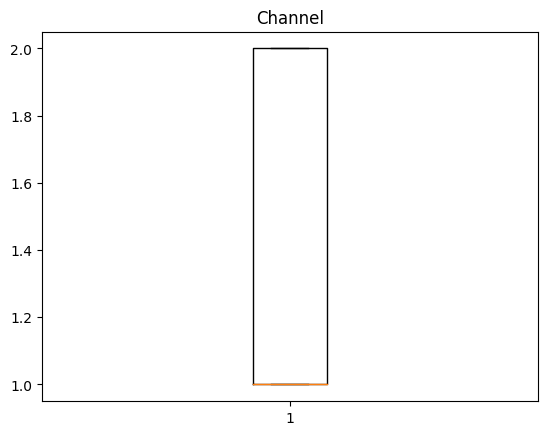

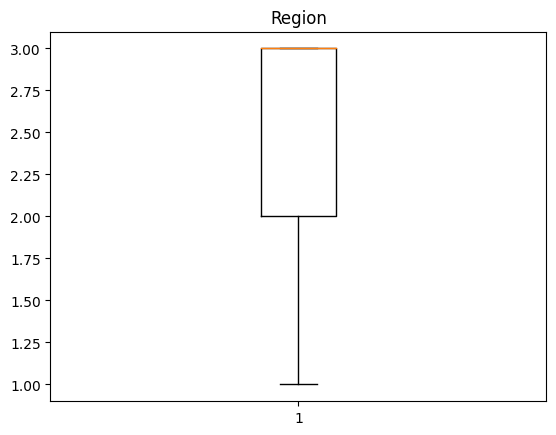

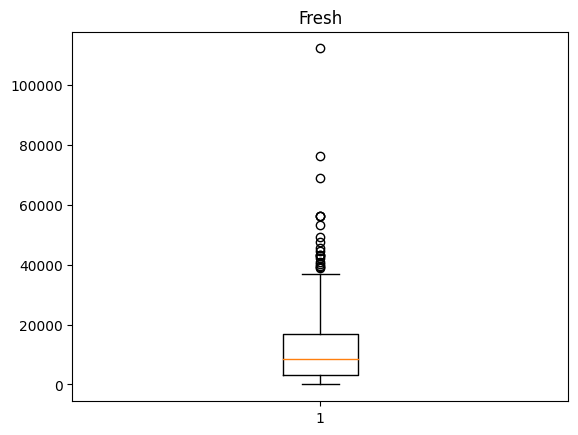

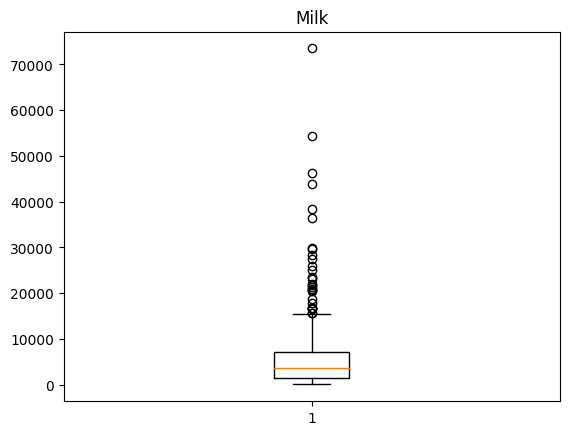

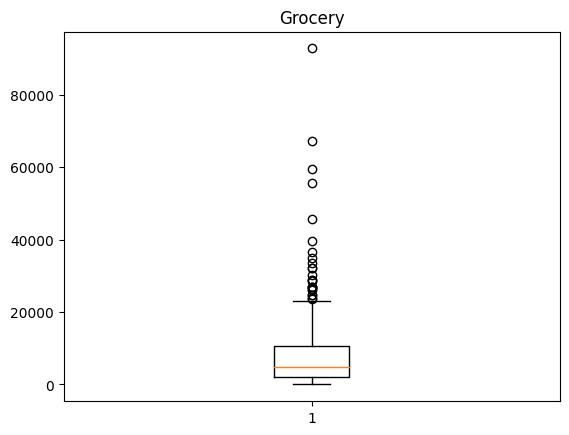

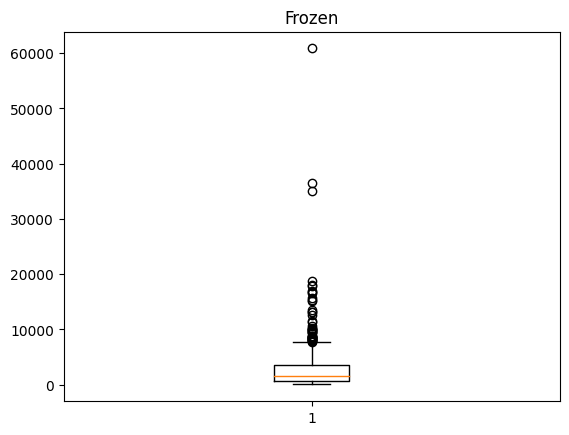

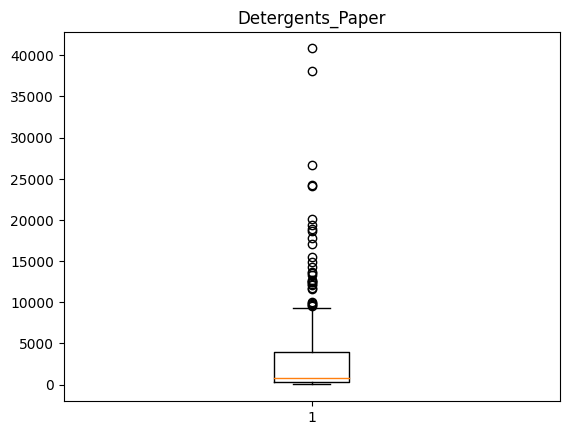

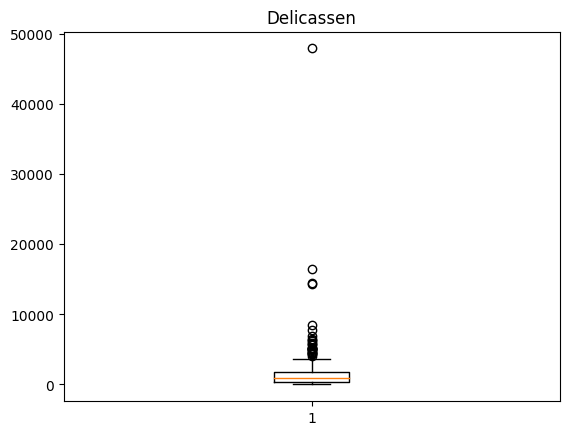

In [9]:
import matplotlib.pyplot as plt
for col in df.columns:
  plt.figure()
  plt.boxplot(df[col])
  plt.title(col)

In [10]:
out_col=['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']

In [11]:
def remove_outliers(df, col_name):
  q1 = df[col_name].quantile(0.25)
  q3 = df[col_name].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  df = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]
  return df

for col in out_col:
  df = remove_outliers(df, col)

df.shape

(318, 8)

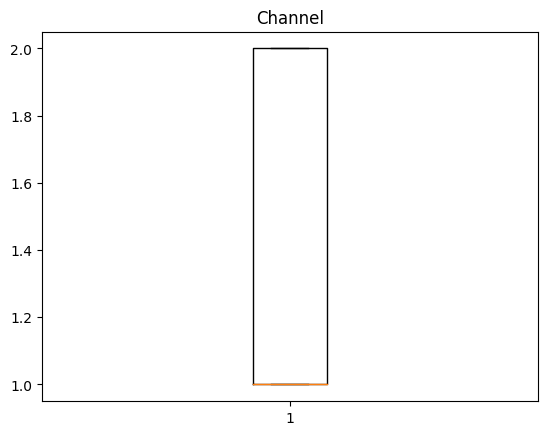

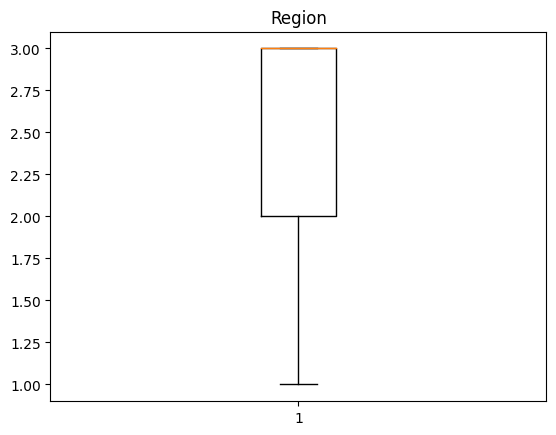

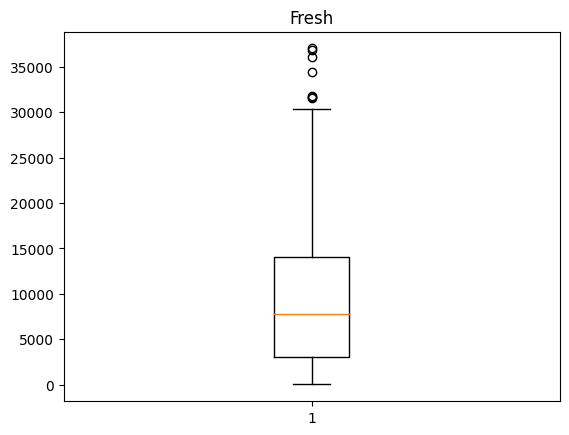

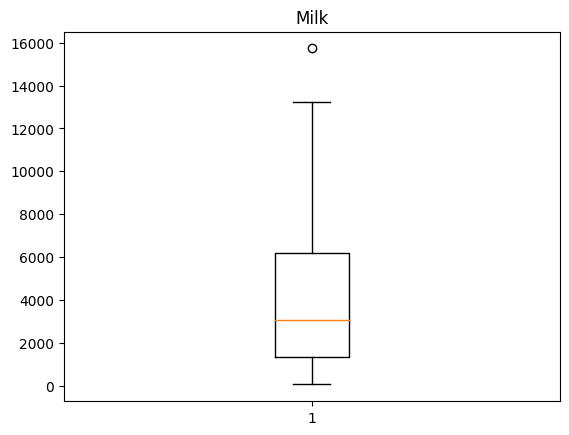

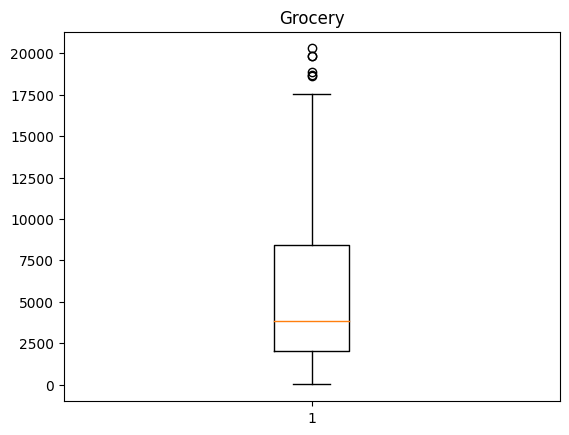

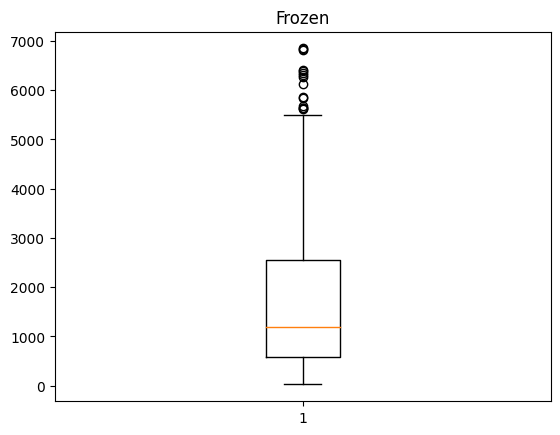

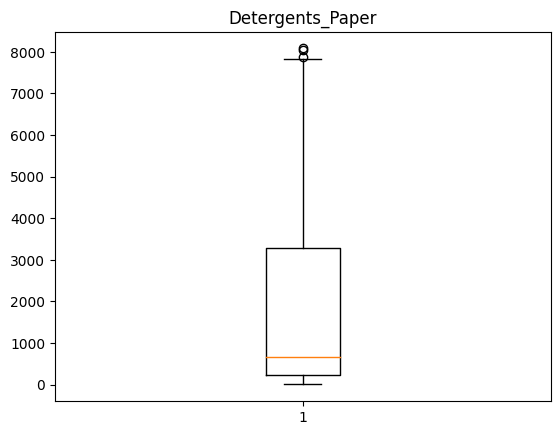

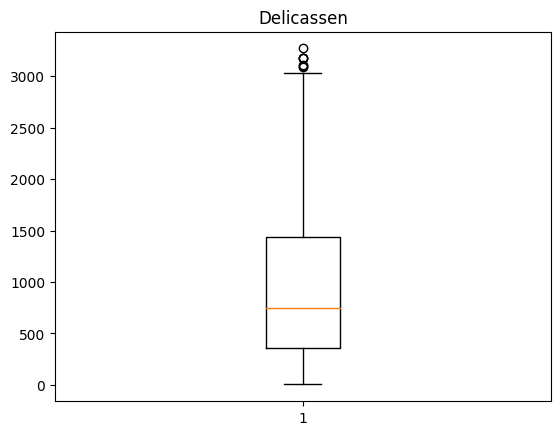

In [12]:
import matplotlib.pyplot as plt
for col in df.columns:
  plt.figure()
  plt.boxplot(df[col])
  plt.title(col)


## Scalar

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaler=scaler.fit_transform(df)

In [14]:
x_scaled_data=pd.DataFrame(x_scaler,columns=df.columns)

In [15]:
x_scaled_data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.642460,0.572024,0.360420,1.740710,0.432714,-0.984801,0.378277,0.451178
1,1.642460,0.572024,-0.325039,1.788015,0.867526,-0.023386,0.659241,1.009718
2,-0.608843,0.572024,0.433216,-0.857996,-0.290889,2.859618,-0.605321,1.025020
3,1.642460,0.572024,-0.037274,1.311586,-0.094823,-0.704078,-0.020699,0.595276
4,1.642460,0.572024,0.294097,-0.242723,0.305758,-0.819597,0.589794,-0.560060
...,...,...,...,...,...,...,...,...
313,-0.608843,0.572024,1.392273,-0.868440,-0.175416,-0.950642,-0.232670,-0.751340
314,-0.608843,0.572024,-0.944909,-0.236887,-0.881903,-0.160642,-0.673860,0.592726
315,-0.608843,0.572024,0.856559,-0.020635,0.526522,-0.690414,0.240746,-0.186425
316,-0.608843,0.572024,0.069845,-0.616863,-0.721801,-0.473040,-0.759193,1.454764


## Cluster

In [16]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=42)

In [17]:
kmeans.fit(x_scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [18]:
pred_clusters=kmeans.predict(x_scaled_data)

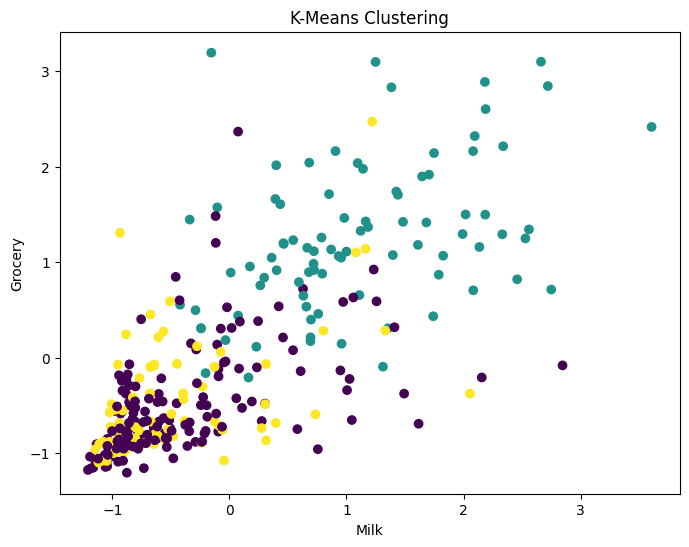

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(x_scaled_data['Milk'],x_scaled_data['Grocery'],c=pred_clusters)
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.title('K-Means Clustering')
plt.show()

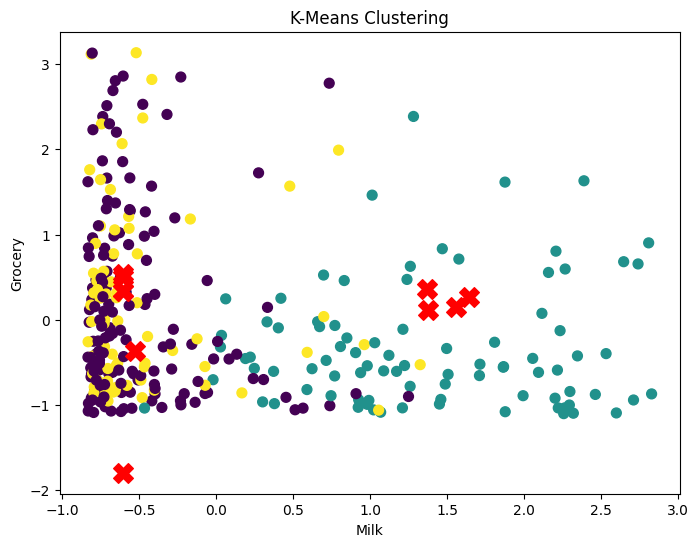

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(x_scaled_data['Detergents_Paper'],x_scaled_data['Frozen'],c=pred_clusters ,s=50)
centroids=kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],c='red',s=200,marker='X')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.title('K-Means Clustering')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

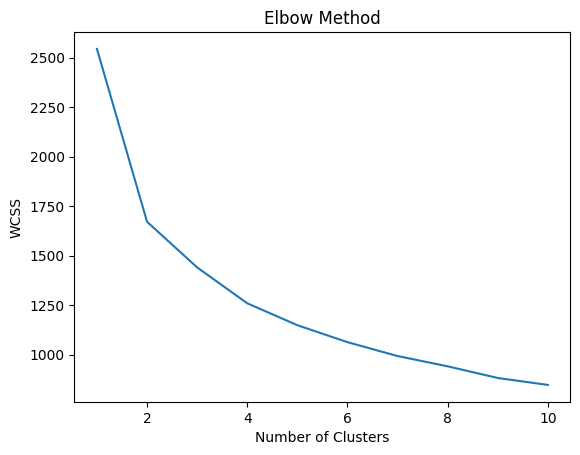

In [24]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=42)
  kmeans.fit(x_scaled_data)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [25]:
from sklearn.cluster import AgglomerativeClustering
agglo_clustering=AgglomerativeClustering(affinity='euclidean',linkage='ward',n_clusters=3)
y_agglo=agglo_clustering.fit_predict(x_scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Text(0, 0.5, 'Grocery')

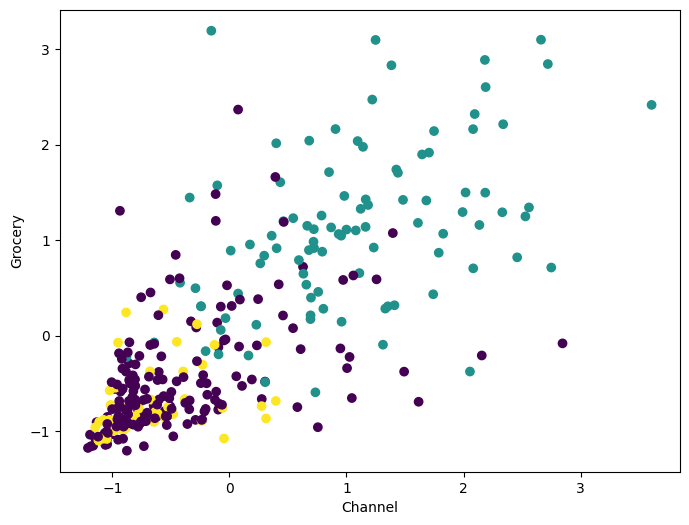

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(x_scaled_data['Milk'],x_scaled_data['Grocery'],c=y_agglo)
plt.xlabel('Channel')
plt.ylabel('Grocery')

## Dendrogram

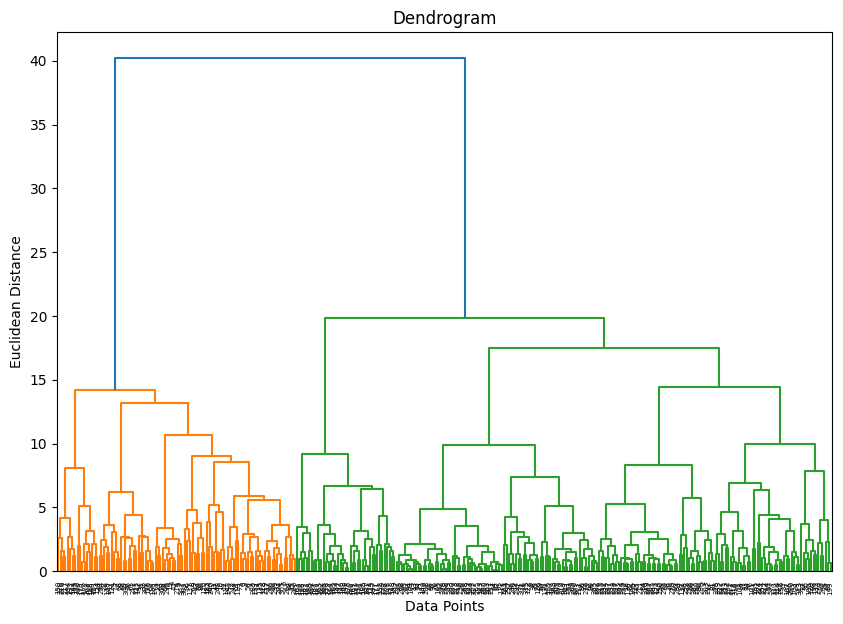

In [32]:
from scipy.cluster.hierarchy import dendrogram , linkage
z=linkage(x_scaled_data,method='ward')
plt.figure(figsize=(10,7))
dendrogram(z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

## Silhouette score

In [33]:
from sklearn.metrics import silhouette_score

In [34]:
help(silhouette_score)

Help on function silhouette_score in module sklearn.metrics.cluster._unsupervised:

silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)
    Compute the mean Silhouette Coefficient of all samples.
    
    The Silhouette Coefficient is calculated using the mean intra-cluster
    distance (``a``) and the mean nearest-cluster distance (``b``) for each
    sample.  The Silhouette Coefficient for a sample is ``(b - a) / max(a,
    b)``.  To clarify, ``b`` is the distance between a sample and the nearest
    cluster that the sample is not a part of.
    Note that Silhouette Coefficient is only defined if number of labels
    is ``2 <= n_labels <= n_samples - 1``.
    
    This function returns the mean Silhouette Coefficient over all samples.
    To obtain the values for each sample, use :func:`silhouette_samples`.
    
    The best value is 1 and the worst value is -1. Values near 0 indicate
    overlapping clusters. Negative values generally indi

In [35]:
silhouette_avg = silhouette_score(x_scaled_data, y_agglo)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.24383688964644132


In [37]:
silh_score=[]
for i in range(2,11):
  agglo_clustering=AgglomerativeClustering(affinity='euclidean',linkage='ward',n_clusters=i)
  agglo_labels =  agglo_clustering.fit_predict(x_scaled_data)
  silhouette_avg = silhouette_score(x_scaled_data, agglo_labels)
  silh_score.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and wi

Text(0.5, 1.0, 'Silhouette Score')

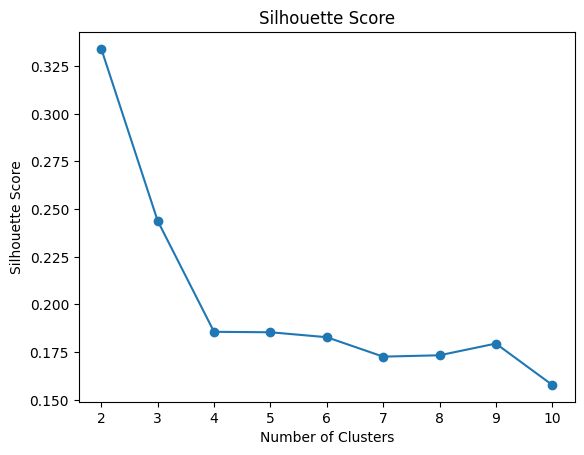

In [38]:
plt.plot(range(2,11),silh_score,marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')